# SDA: Project

**Name**: Nitai Nijholt

**Student ID**: 12709018

In [185]:
#loading the Twitter sentiment dataset

In [186]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import sys
from datetime import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR, VARMAX
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch


In [187]:
#returning the filenames

dirname = 'Data'
filenames = os.listdir(dirname)
filenames


['stock_data.csv',
 'tweets_remaining_09042020_16072020.csv',
 'companiesmarketcap.com - Companies ranked by Market Cap - CompaniesMarketCap.com.csv',
 'data.text',
 'us_equities_news_dataset.csv',
 'tweets_labelled_09042020_16072020.csv']

In [188]:
# Twitter sentiment data about stocks, labeled: 'tweets_labelled_09042020_16072020.csv',
# reference to dataset: https://www.kaggle.com/datasets/utkarshxy/stock-markettweets-lexicon-data

twitter_sentiment_data_labled = pd.read_csv("Data/tweets_labelled_09042020_16072020.csv", sep=';',error_bad_lines=False )

df = twitter_sentiment_data_labled

/tmp/ipykernel_28085/1646733642.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  twitter_sentiment_data_labled = pd.read_csv("Data/tweets_labelled_09042020_16072020.csv", sep=';',error_bad_lines=False )


In [189]:
twitter_sentiment_data_labled.shape

(5000, 4)

In [190]:
df.columns

Index(['id', 'created_at', 'text', 'sentiment'], dtype='object')

## Data cleaning

In [191]:
df[df['sentiment'].isnull()]

,id,created_at,text,sentiment
1300,254563,2020-04-29 01:57:02+00:00,- @investbamboo get $ share on Bamboo then. [ ...,NaN
1301,280832,2020-05-05 17:58:44+00:00,H&amp;S just formed on 4h chart $spx $spy http...,NaN
1302,672447,2020-06-26 15:29:14+00:00,@EddyElfenbein what happened to $FB?,NaN
1303,146759,2020-04-21 11:53:54+00:00,RT @CHItraders: $AAPL expands services busines...,NaN
1304,116538,2020-04-19 23:34:14+00:00,RT @Lakshmi_888: #SPX $SPX #ES_F $NQ $RUT #DAX...,NaN
...,...,...,...,...
4995,411380,2020-06-04 18:14:57+00:00,"With ad revenues falling, what’s the impact on...",NaN
4996,62318,2020-04-14 02:15:01+00:00,RT @KelvinSCWong: Well another point to add to...,NaN
4997,627230,2020-06-23 14:08:15+00:00,$ITOX working on a contract with a fortune 500...,NaN
4998,890123,2020-07-14 23:18:34+00:00,"$DIS it could break the 120 pin, then 125&gt; ...",NaN


In [192]:
df[df['sentiment'].notnull()]


,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
...,...,...,...,...
1295,75519,2020-04-15 06:00:10+00:00,#stocks back from the recovery room: https://t...,positive
1296,739234,2020-07-01 11:29:10+00:00,RT @MacroCharts: Breadth – expanding last week...,positive
1297,254379,2020-04-29 02:21:50+00:00,RT @MawsonResource: Rompas-Rajapalot: A Big Ne...,neutral
1298,580441,2020-06-19 17:56:57+00:00,$AAPL $QQQ Top may now be in. https://t.co/iNK...,positive


We can see the first 1300 rows have sentiment data, so we quantify the sentiment data for only these rows

In [193]:
subset_data_with_sentiment = df.iloc[0:1300]

In [194]:
subset_data_with_sentiment.shape
df = subset_data_with_sentiment
# shape looks good

In [195]:
#positive

list_of_sentiment = []
list_of_rows_without_sentiment =[]
for i in df[ 'sentiment']:
    if i == 'positive':
        list_of_sentiment.append(1)
    if i == 'neutral':
        list_of_sentiment.append(0)
    if i == 'negative':
        list_of_sentiment.append(-1)


In [196]:
df['quantitative sentiment'] = list_of_sentiment

/tmp/ipykernel_28085/3881601052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantitative sentiment'] = list_of_sentiment


In [197]:
df

,id,created_at,text,sentiment,quantitative sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive,1
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,-1
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,1
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive,1
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,1
...,...,...,...,...,...
1295,75519,2020-04-15 06:00:10+00:00,#stocks back from the recovery room: https://t...,positive,1
1296,739234,2020-07-01 11:29:10+00:00,RT @MacroCharts: Breadth – expanding last week...,positive,1
1297,254379,2020-04-29 02:21:50+00:00,RT @MawsonResource: Rompas-Rajapalot: A Big Ne...,neutral,0
1298,580441,2020-06-19 17:56:57+00:00,$AAPL $QQQ Top may now be in. https://t.co/iNK...,positive,1


In [198]:
    # FINANCIAL NEWS 
news = pd.read_csv('Data/us_equities_news_dataset.csv')

    # TOP 7106 COMPANIES BY MARKET CAP
market = pd.read_csv('Data/companiesmarketcap.com - Companies ranked by Market Cap - CompaniesMarketCap.com.csv')

**Selecting companies to study**

From our `news_data` we can see what companies are mentioned and in how many articles. We of course would like to study those companies that are mentioned most often so we have more data to perform our sentiment analysis on. Nevertheless our `stock_data` also will condition this choice, as we want to select companies with the highest market cap possible so the finance data is most granular (e.g. every few minutes there is a stock value point) and people are most likely interested in it. Therefore we now find those companies that are most often mentioned in the `news_data` and also have the highest market cap. 

In [199]:
# FIND MOST FREQUENTLY MENTIONED TICKERS
tickers = news['ticker'].value_counts()
tick_mc = market[['Rank','Symbol','marketcap']]
tick_an = pd.DataFrame({'Symbol':list(tickers.index),'Article_n':list(tickers)})
# tick_mc_an = tick_mc.merge(tick_an, on = 'Symbol').head(n=20).sort_values(by= 'Article_n', ascending= False)
tick_mc_an = tick_mc.merge(tick_an, on = 'Symbol').head(n=20).sort_values(by= 'Rank', ascending= True)
tick_mc_an.head(n = 20)


,Rank,Symbol,marketcap,Article_n
0,1,AAPL,2245746491392,20231
1,3,MSFT,1791532859392,8110
2,5,AMZN,942841135104,6330
3,7,TSLA,562562130000,4283
4,8,UNH,493336264704,327
5,9,JNJ,460383748096,763
6,10,XOM,455235764224,2831
7,11,V,442776518656,193
8,12,WMT,415197298688,1267
9,14,JPM,400557768704,2600


In [200]:
top_10_ranked_stocks_by_marketcap = tick_mc_an.loc[0:10, "Symbol"]
top_10_ranked_stocks_by_marketcap

0     AAPL
1     MSFT
2     AMZN
3     TSLA
4      UNH
5      JNJ
6      XOM
7        V
8      WMT
9      JPM
10    NVDA
Name: Symbol, dtype: object

In [201]:
top_10_ranked_stocks_by_marketcap_str = top_10_ranked_stocks_by_marketcap.astype(str).values.tolist()

In [202]:
top_10_ranked_stocks_by_marketcap_str

['AAPL',
 'MSFT',
 'AMZN',
 'TSLA',
 'UNH',
 'JNJ',
 'XOM',
 'V',
 'WMT',
 'JPM',
 'NVDA']

In [203]:
msft = yf.Ticker("MSFT")

In [204]:
hist = msft.history(period="5d")

In [205]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-25 00:00:00-05:00,247.309998,248.699997,246.729996,247.490005,9200800,0,0
2022-11-28 00:00:00-05:00,246.080002,246.649994,240.800003,241.759995,24778200,0,0
2022-11-29 00:00:00-05:00,241.399994,242.789993,238.210007,240.330002,17956300,0,0
2022-11-30 00:00:00-05:00,240.570007,255.330002,239.860001,255.139999,47594200,0,0
2022-12-01 00:00:00-05:00,253.869995,256.119995,250.919998,254.690002,26024100,0,0


In [206]:
downloaded_stock_data = yf.download(top_10_ranked_stocks_by_marketcap_str, start="2011-01-01", end="2019-12-31", group_by="ticker")
downloaded_stock_data.to_csv("Data/stock_data.csv")

[*********************100%***********************]  11 of 11 completed


In [207]:
df_stock_data = pd.read_csv("Data/stock_data.csv")
df_stock_data

,Unnamed: 0,NVDA,NVDA.1,NVDA.2,NVDA.3,NVDA.4,NVDA.5,JPM,JPM.1,JPM.2,...,AMZN.2,AMZN.3,AMZN.4,AMZN.5,TSLA,TSLA.1,TSLA.2,TSLA.3,TSLA.4,TSLA.5
0,NaN,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,...,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-03,3.880000114440918,3.992500066757202,3.875,3.9549999237060547,3.6297101974487305,81744800,43.0,44.040000915527344,42.959999084472656,...,9.060500144958496,9.211000442504883,9.211000442504883,106628000,1.7893329858779907,1.7999999523162842,1.726667046546936,1.7746670246124268,1.7746670246124268,19245000
3,2011-01-04,3.9625000953674316,3.9800000190734863,3.8550000190734863,3.942500114440918,3.618238925933838,65138400,43.779998779296875,44.29999923706055,43.34000015258789,...,9.189000129699707,9.250499725341797,9.250499725341797,100636000,1.7773330211639404,1.7966669797897339,1.7346669435501099,1.777999997138977,1.777999997138977,17811000
4,2011-01-05,4.014999866485596,4.25,3.9749999046325684,4.244999885559082,3.895857572555542,142821600,43.91999816894531,44.95000076293945,43.900001525878906,...,9.203499794006348,9.371000289916992,9.371000289916992,68376000,1.7653330564498901,1.7933330535888672,1.746000051498413,1.7886669635772705,1.7886669635772705,21700500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2019-12-23,60.130001068115234,60.45249938964844,59.59749984741211,59.70500183105469,59.49899673461914,35506000,137.60000610351562,137.91000366210938,136.8800048828125,...,89.22550201416016,89.6500015258789,89.6500015258789,42728000,27.45199966430664,28.134000778198242,27.333332061767578,27.947999954223633,27.947999954223633,199794000
2261,2019-12-24,59.54999923706055,59.82749938964844,59.20500183105469,59.654998779296875,59.449161529541016,13886400,137.3300018310547,137.6300048828125,137.05999755859375,...,89.37899780273438,89.46050262451172,89.46050262451172,17626000,27.890666961669922,28.364667892456055,27.512666702270508,28.350000381469727,28.350000381469727,120820500
2262,2019-12-26,59.689998626708984,60.08000183105469,59.5,59.79750061035156,59.5911750793457,18285200,137.88999938964844,139.10000610351562,137.77999877929688,...,89.9749984741211,93.4384994506836,93.4384994506836,120108000,28.527332305908203,28.898666381835938,28.42333221435547,28.729333877563477,28.729333877563477,159508500
2263,2019-12-27,59.95000076293945,60.084999084472656,58.95249938964844,59.217498779296875,59.01316833496094,25464400,139.3000030517578,139.77000427246094,138.6699981689453,...,93.30049896240234,93.48999786376953,93.48999786376953,123732000,29.0,29.020666122436523,28.407333374023438,28.691999435424805,28.691999435424805,149185500


In [208]:
column_indexer_adjusted_close_only = ['Unnamed: 0',  'NVDA.4', 'TSLA.4', 'AMZN.4',  'V.4', 'JPM.4', 'AAPL.4',  'MSFT.4', 'UNH.4', 'WMT.4','JNJ.4',
        'XOM.4']
df_stock_data[column_indexer_adjusted_close_only]

,Unnamed: 0,NVDA.4,TSLA.4,AMZN.4,V.4,JPM.4,AAPL.4,MSFT.4,UNH.4,WMT.4,JNJ.4,XOM.4
0,NaN,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-03,3.6297101974487305,1.7746670246124268,9.211000442504883,16.1849365234375,31.384611129760742,10.0332612991333,21.8563289642334,31.065305709838867,41.66514205932617,44.5223503112793,46.50218200683594
3,2011-01-04,3.618238925933838,1.777999997138977,9.250499725341797,16.203298568725586,31.838834762573242,10.085626602172852,21.942258834838867,31.349767684936523,41.82551193237305,44.897979736328125,46.720489501953125
4,2011-01-05,3.895857572555542,1.7886669635772705,9.371000289916992,16.545269012451172,32.22816467285156,10.168127059936523,21.871952056884766,31.450166702270508,41.55059814453125,44.869632720947266,46.59574508666992
...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2019-12-23,59.49899673461914,27.947999954223633,89.6500015258789,183.4129180908203,125.19732666015625,69.55709838867188,153.03125,283.53826904296875,113.8871841430664,135.4996337890625,58.98112106323242
2261,2019-12-24,59.449161529541016,28.350000381469727,89.46050262451172,183.89332580566406,125.54411315917969,69.62322235107422,153.00205993652344,283.009765625,114.34644317626953,135.02774047851562,58.754573822021484
2262,2019-12-26,59.5911750793457,28.729333877563477,93.4384994506836,185.45211791992188,126.87638092041016,71.00457000732422,154.2561798095703,284.0763244628906,114.35600280761719,134.93519592285156,58.84687423706055
2263,2019-12-27,59.01316833496094,28.691999435424805,93.48999786376953,185.6776123046875,126.9676284790039,70.9776382446289,154.5381317138672,284.3838806152344,114.4229736328125,134.86122131347656,58.645484924316406


In [209]:
#dropping first two rows

df_stock_data = df_stock_data[column_indexer_adjusted_close_only].loc[2:,:]
#renaming date column to be a date
df_stock_data = df_stock_data.rename(columns={"Unnamed: 0": "Date"})
df_stock_data

,Date,NVDA.4,TSLA.4,AMZN.4,V.4,JPM.4,AAPL.4,MSFT.4,UNH.4,WMT.4,JNJ.4,XOM.4
2,2011-01-03,3.6297101974487305,1.7746670246124268,9.211000442504883,16.1849365234375,31.384611129760742,10.0332612991333,21.8563289642334,31.065305709838867,41.66514205932617,44.5223503112793,46.50218200683594
3,2011-01-04,3.618238925933838,1.777999997138977,9.250499725341797,16.203298568725586,31.838834762573242,10.085626602172852,21.942258834838867,31.349767684936523,41.82551193237305,44.897979736328125,46.720489501953125
4,2011-01-05,3.895857572555542,1.7886669635772705,9.371000289916992,16.545269012451172,32.22816467285156,10.168127059936523,21.871952056884766,31.450166702270508,41.55059814453125,44.869632720947266,46.59574508666992
5,2011-01-06,4.435037612915039,1.858667016029358,9.293000221252441,16.79313850402832,32.069557189941406,10.159910202026367,22.512493133544922,32.102745056152344,41.206939697265625,44.79874801635742,46.89516067504883
6,2011-01-07,4.558933258056641,1.8826669454574585,9.274499893188477,16.74493980407715,31.463926315307617,10.232666969299316,22.34064483642578,32.16968536376953,41.298583984375,44.36642837524414,47.15089797973633
...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2019-12-23,59.49899673461914,27.947999954223633,89.6500015258789,183.4129180908203,125.19732666015625,69.55709838867188,153.03125,283.53826904296875,113.8871841430664,135.4996337890625,58.98112106323242
2261,2019-12-24,59.449161529541016,28.350000381469727,89.46050262451172,183.89332580566406,125.54411315917969,69.62322235107422,153.00205993652344,283.009765625,114.34644317626953,135.02774047851562,58.754573822021484
2262,2019-12-26,59.5911750793457,28.729333877563477,93.4384994506836,185.45211791992188,126.87638092041016,71.00457000732422,154.2561798095703,284.0763244628906,114.35600280761719,134.93519592285156,58.84687423706055
2263,2019-12-27,59.01316833496094,28.691999435424805,93.48999786376953,185.6776123046875,126.9676284790039,70.9776382446289,154.5381317138672,284.3838806152344,114.4229736328125,134.86122131347656,58.645484924316406


In [210]:

#casting the date column as a date
df_stock_data['Date'] = [dt.strptime(d, "%Y-%m-%d").date() for d in df_stock_data["Date"]]
df_stock_data.rename(columns = {'NVDA.4':'NVDA', 'TSLA.4':'TSLA', 'AMZN.4':'AMZN', 'V.4':'V','JPM.4':'JPM','AAPL.4':'AAPL', 'MSFT.4':'MSFT', 'UNH.4':'UNH', 'WMT.4':'WMT', 'JNJ.4':'JNJ','XOM.4':'XOM'}, inplace = True)


In [211]:
df_stock_data

,Date,NVDA,TSLA,AMZN,V,JPM,AAPL,MSFT,UNH,WMT,JNJ,XOM
2,2011-01-03,3.6297101974487305,1.7746670246124268,9.211000442504883,16.1849365234375,31.384611129760742,10.0332612991333,21.8563289642334,31.065305709838867,41.66514205932617,44.5223503112793,46.50218200683594
3,2011-01-04,3.618238925933838,1.777999997138977,9.250499725341797,16.203298568725586,31.838834762573242,10.085626602172852,21.942258834838867,31.349767684936523,41.82551193237305,44.897979736328125,46.720489501953125
4,2011-01-05,3.895857572555542,1.7886669635772705,9.371000289916992,16.545269012451172,32.22816467285156,10.168127059936523,21.871952056884766,31.450166702270508,41.55059814453125,44.869632720947266,46.59574508666992
5,2011-01-06,4.435037612915039,1.858667016029358,9.293000221252441,16.79313850402832,32.069557189941406,10.159910202026367,22.512493133544922,32.102745056152344,41.206939697265625,44.79874801635742,46.89516067504883
6,2011-01-07,4.558933258056641,1.8826669454574585,9.274499893188477,16.74493980407715,31.463926315307617,10.232666969299316,22.34064483642578,32.16968536376953,41.298583984375,44.36642837524414,47.15089797973633
...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2019-12-23,59.49899673461914,27.947999954223633,89.6500015258789,183.4129180908203,125.19732666015625,69.55709838867188,153.03125,283.53826904296875,113.8871841430664,135.4996337890625,58.98112106323242
2261,2019-12-24,59.449161529541016,28.350000381469727,89.46050262451172,183.89332580566406,125.54411315917969,69.62322235107422,153.00205993652344,283.009765625,114.34644317626953,135.02774047851562,58.754573822021484
2262,2019-12-26,59.5911750793457,28.729333877563477,93.4384994506836,185.45211791992188,126.87638092041016,71.00457000732422,154.2561798095703,284.0763244628906,114.35600280761719,134.93519592285156,58.84687423706055
2263,2019-12-27,59.01316833496094,28.691999435424805,93.48999786376953,185.6776123046875,126.9676284790039,70.9776382446289,154.5381317138672,284.3838806152344,114.4229736328125,134.86122131347656,58.645484924316406


In [212]:
df_stock_data.rename(columns = {'NVDA.4':'NVDA', 'TSLA.4':'TSLA', 'AMZN.4':'AMZN', 'V.4':'V','JPM.4':'JPM','AAPL.4':'AAPL', 'MSFT.4':'MSFT', 'UNH.4':'UNH', 'WMT.4':'WMT', 'JNJ.4':'JNJ','XOM.4':'XOM'}, inplace = True)

In [213]:
df_stock_data

,Date,NVDA,TSLA,AMZN,V,JPM,AAPL,MSFT,UNH,WMT,JNJ,XOM
2,2011-01-03,3.6297101974487305,1.7746670246124268,9.211000442504883,16.1849365234375,31.384611129760742,10.0332612991333,21.8563289642334,31.065305709838867,41.66514205932617,44.5223503112793,46.50218200683594
3,2011-01-04,3.618238925933838,1.777999997138977,9.250499725341797,16.203298568725586,31.838834762573242,10.085626602172852,21.942258834838867,31.349767684936523,41.82551193237305,44.897979736328125,46.720489501953125
4,2011-01-05,3.895857572555542,1.7886669635772705,9.371000289916992,16.545269012451172,32.22816467285156,10.168127059936523,21.871952056884766,31.450166702270508,41.55059814453125,44.869632720947266,46.59574508666992
5,2011-01-06,4.435037612915039,1.858667016029358,9.293000221252441,16.79313850402832,32.069557189941406,10.159910202026367,22.512493133544922,32.102745056152344,41.206939697265625,44.79874801635742,46.89516067504883
6,2011-01-07,4.558933258056641,1.8826669454574585,9.274499893188477,16.74493980407715,31.463926315307617,10.232666969299316,22.34064483642578,32.16968536376953,41.298583984375,44.36642837524414,47.15089797973633
...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2019-12-23,59.49899673461914,27.947999954223633,89.6500015258789,183.4129180908203,125.19732666015625,69.55709838867188,153.03125,283.53826904296875,113.8871841430664,135.4996337890625,58.98112106323242
2261,2019-12-24,59.449161529541016,28.350000381469727,89.46050262451172,183.89332580566406,125.54411315917969,69.62322235107422,153.00205993652344,283.009765625,114.34644317626953,135.02774047851562,58.754573822021484
2262,2019-12-26,59.5911750793457,28.729333877563477,93.4384994506836,185.45211791992188,126.87638092041016,71.00457000732422,154.2561798095703,284.0763244628906,114.35600280761719,134.93519592285156,58.84687423706055
2263,2019-12-27,59.01316833496094,28.691999435424805,93.48999786376953,185.6776123046875,126.9676284790039,70.9776382446289,154.5381317138672,284.3838806152344,114.4229736328125,134.86122131347656,58.645484924316406


In [214]:
# def plot_single_stock(df: pd.DataFrame, tickers: list):
#     x_values = [date for date in df["Date"]]
#     for ticker in tickers:
#         y_values = [float(price) for price in df[ticker]]
#         plt.plot(x_values, y_values, label = ticker)
#     plt.ylabel("Price (USD)")
#     plt.legend()
#     plt.show()

In [215]:
def plot_single_stock(df: pd.DataFrame, ticker:str):
    x_values = [date for date in df["Date"]]
    y_values = [float(price) for price in df[ticker]]
    plt.plot(x_values, y_values, label = ticker)
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()

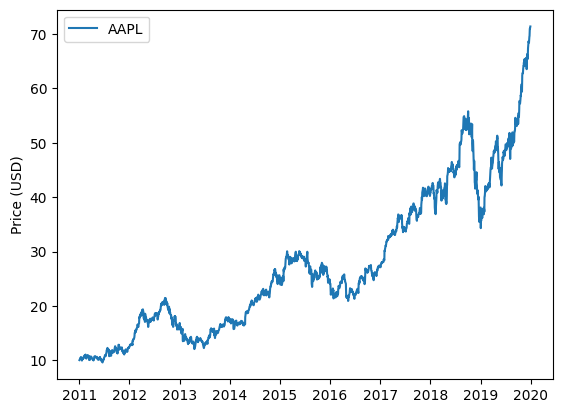

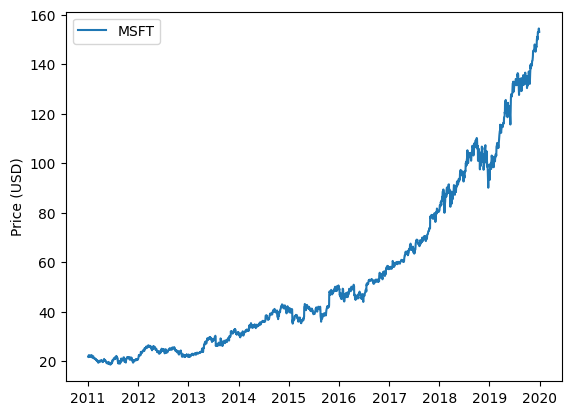

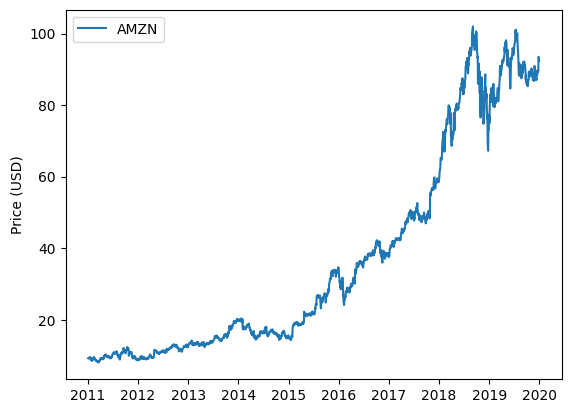

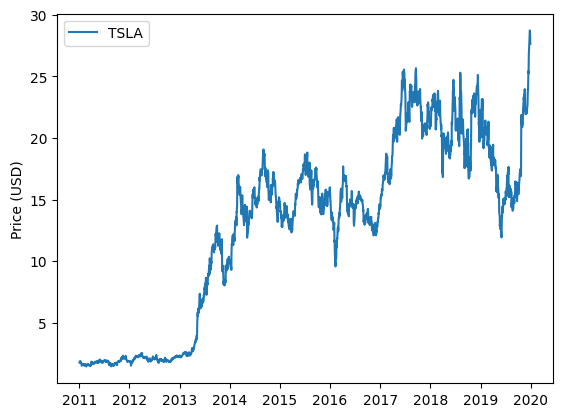

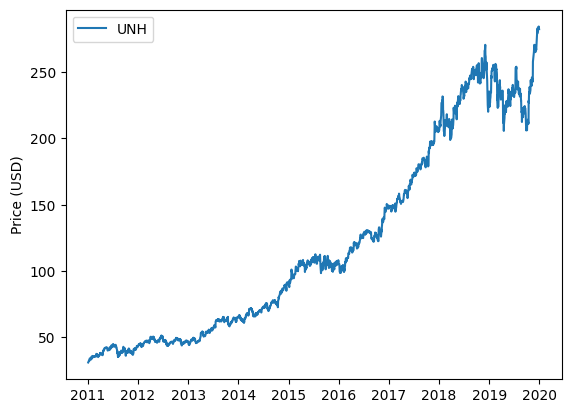

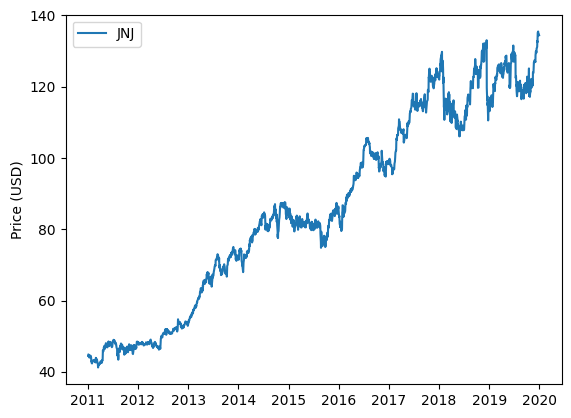

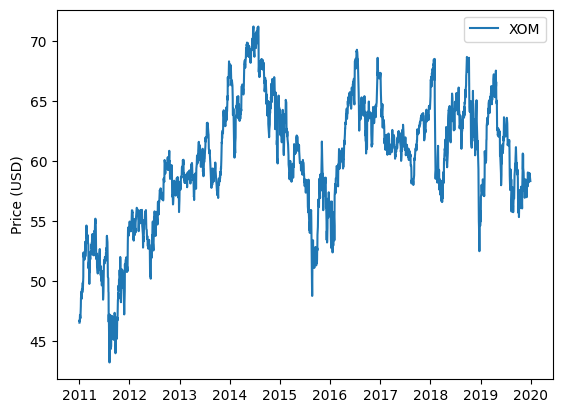

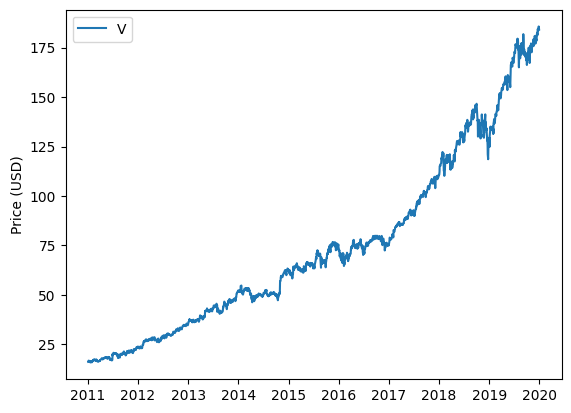

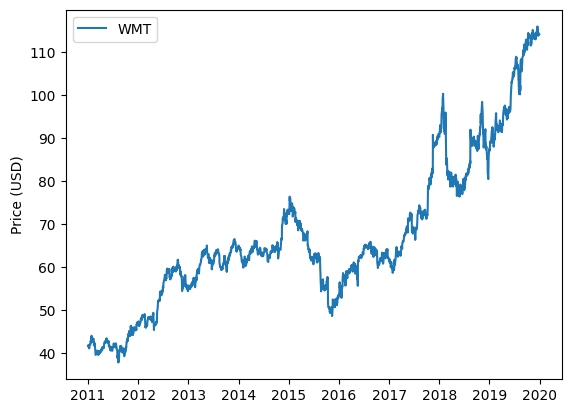

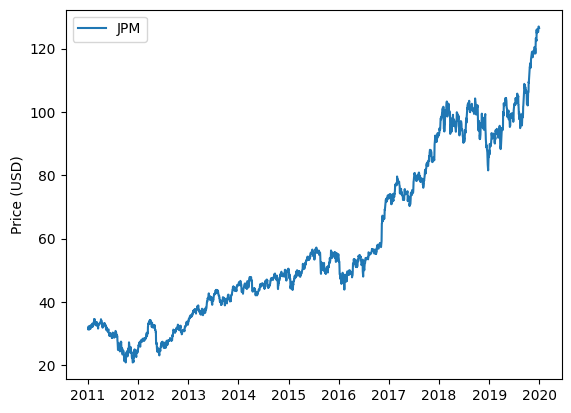

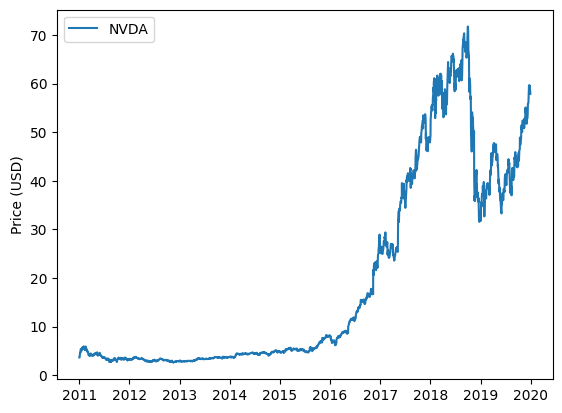

In [216]:
for stock in top_10_ranked_stocks_by_marketcap_str:
    plot_single_stock(df_stock_data, str(stock))

In [217]:
# differencing by taking percentage change in order to make the timeseries stationairy
df_stock_data_pct_change = pd.DataFrame([])
for stock in top_10_ranked_stocks_by_marketcap_str:
    df_stock_data_pct_change[stock] = df_stock_data[stock].astype(float).pct_change()
#         print(value)

In [218]:
df_stock_data_pct_change['Date']= df_stock_data['Date']

looking for missing values

In [219]:

for variable in df_stock_data_pct_change.columns:
    print(df_stock_data_pct_change[variable].isnull().sum())

1
1
1
1
1
1
1
1
1
1
1
0


Looks like values are missing from the price columns. this is as expected, because by taking differences we are losing the value of the first timestep

In [220]:
#skipping the nans in the frist row (as the values there were lost during taking pct change.)
dataframe_stock_data_pct_change =df_stock_data_pct_change[1:]

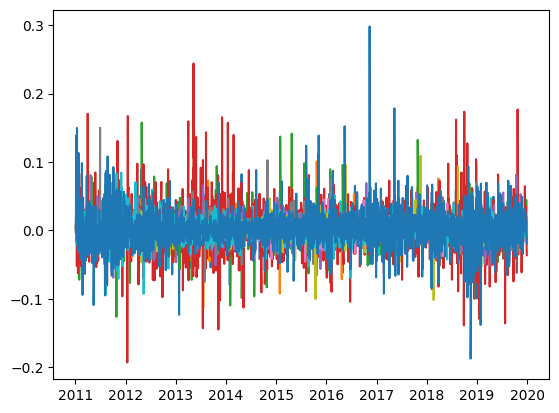

In [221]:
for stock in top_10_ranked_stocks_by_marketcap_str:
    plot_single_stock(dataframe_stock_data_pct_change, str(stock))

Checking for stationarity. Mean looks constant over time, variance does not. Testing for stationarity statistically using the ADF test.

In [222]:
df = dataframe_stock_data_pct_change

In [223]:
#checking if the timeseries are stationairy

Stationary_series =[]
Non_stationairy_series = []
#df.columns[:-1] cause we want to skip the date column
for variable in df.columns[:-1]:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(df[variable])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        print('\n')
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        print('\n')
        Non_stationairy_series.append(variable)
        
print(f'Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}')

Output results augmented Dickey Fuller test for variable: AAPL
ADF Statistic: -14.808822
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: MSFT
ADF Statistic: -18.696631
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: AMZN
ADF Statistic: -34.969185
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: TSLA
ADF Statistic: -48.142770
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Concl

In [224]:
#printing skewness per variable

Skewed_variables = []
Kurtosis_containing_variables = []

for i in df.columns[:-1]:
    print(df[i].describe())
    print(f'Kurtosis: {df[i].kurtosis()}')
    print(f'Skewness: {df[i].skew()}')
    print('\n')
    if df[i].kurtosis() <= -10 or df[i].kurtosis() >= 10:
        Kurtosis_containing_variables.append(i)
    else: 
        continue
    if df[i].skew() >= 3 or df[i].skew() <= -3:
        Skewed_variables.append(i)


if len (Skewed_variables) == 0:
        print(f'All variables have skewness in acceptable ranges (-3 < skewness < 3)\n')
if len (Kurtosis_containing_variables) == 0:
        print(f'All variables have kurtosis in acceptable ranges (-10 < kurtosis < 10)\n')
        print('\n')
elif len (Kurtosis_containing_variables) != 0:
        print(f'Not all variables have kurtosis in acceptable ranges (-10 < kurtosis < 10). The variables which have kurtosis outside this range are: {Kurtosis_containing_variables}\n')
        print('\n')

count    2262.000000
mean        0.000999
std         0.016149
min        -0.123558
25%        -0.006869
50%         0.000887
75%         0.009683
max         0.088741
Name: AAPL, dtype: float64
Kurtosis: 4.7132357363174435
Skewness: -0.22867020901363175


count    2262.000000
mean        0.000964
std         0.014369
min        -0.113996
25%        -0.006394
50%         0.000585
75%         0.008221
max         0.104523
Name: MSFT, dtype: float64
Kurtosis: 6.750706161511729
Skewness: 0.07487284691177155


count    2262.000000
mean        0.001207
std         0.019397
min        -0.126568
25%        -0.008078
50%         0.000980
75%         0.011139
max         0.157457
Name: AMZN, dtype: float64
Kurtosis: 8.89733652182917
Skewness: 0.4657639194345277


count    2262.000000
mean        0.001706
std         0.031516
min        -0.193274
25%        -0.013910
50%         0.000828
75%         0.017533
max         0.243951
Name: TSLA, dtype: float64
Kurtosis: 6.358892141164295
Skewness: 0.

/home/derk/Documents/GitHub/Project_SDA/venv/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


AAPL


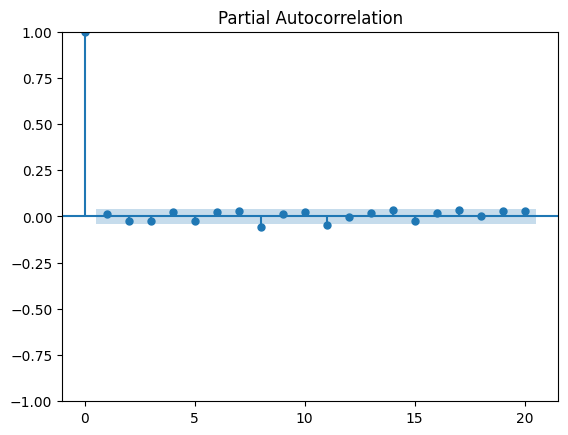

MSFT


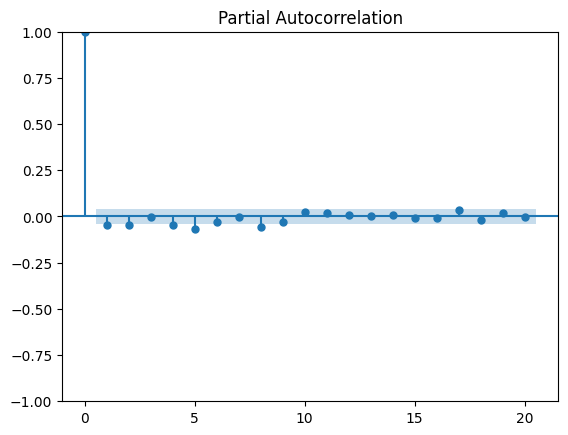

AMZN


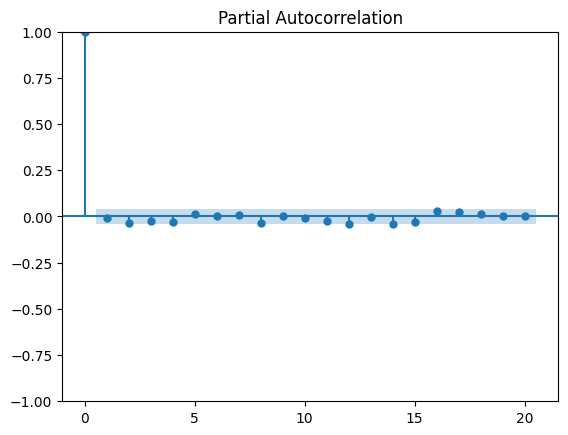

TSLA


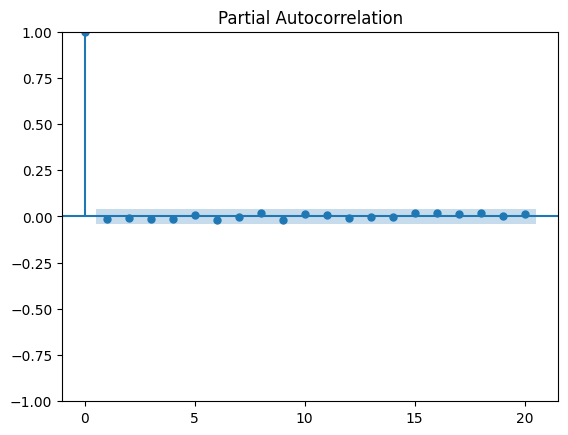

UNH


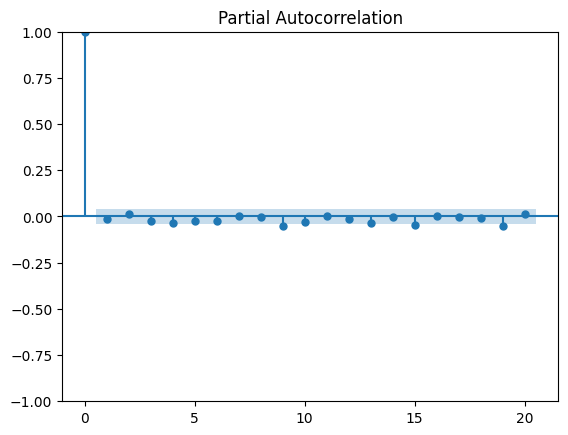

JNJ


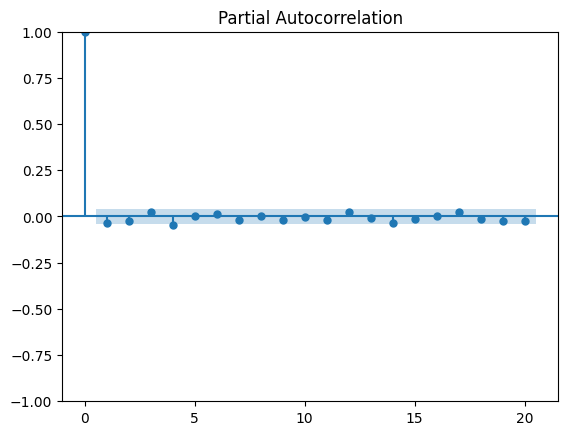

XOM


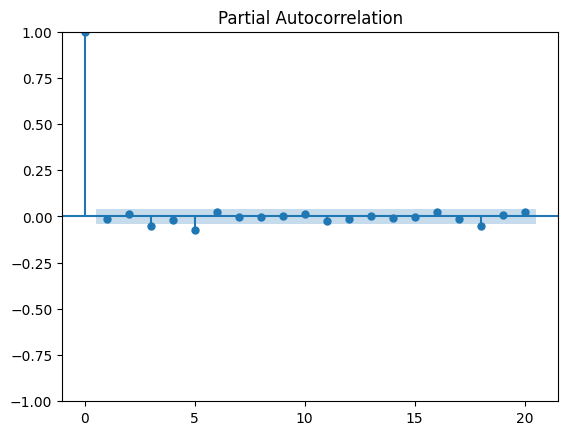

V


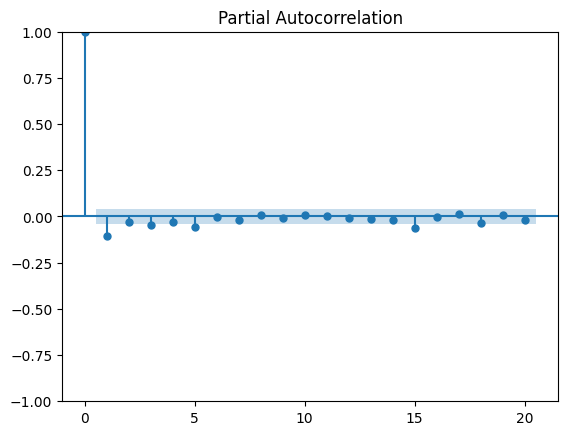

WMT


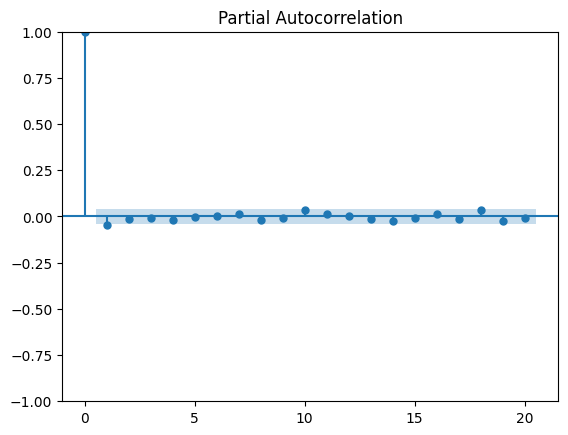

JPM


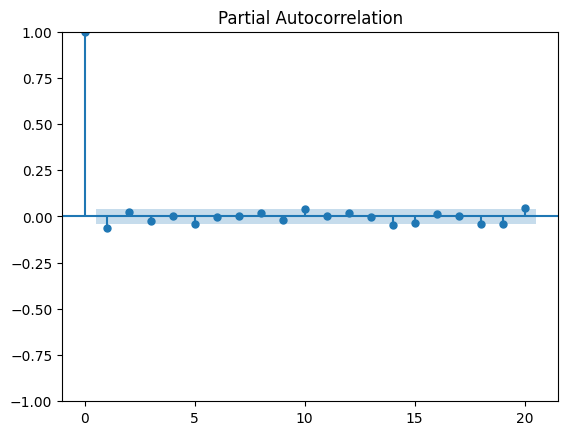

NVDA


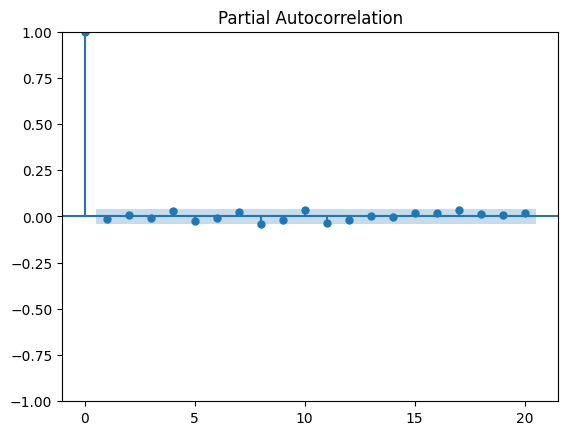

In [225]:
#testing partial auto correlations
for variable in df.columns[:-1]:
    plot_pacf(df[variable], lags = 20)
    print(variable)
    plt.show()

AAPL


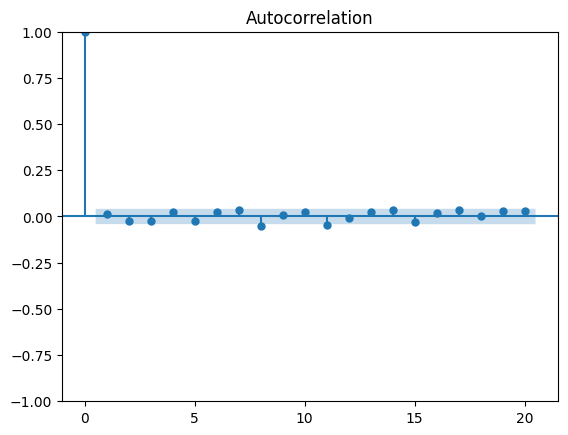

MSFT


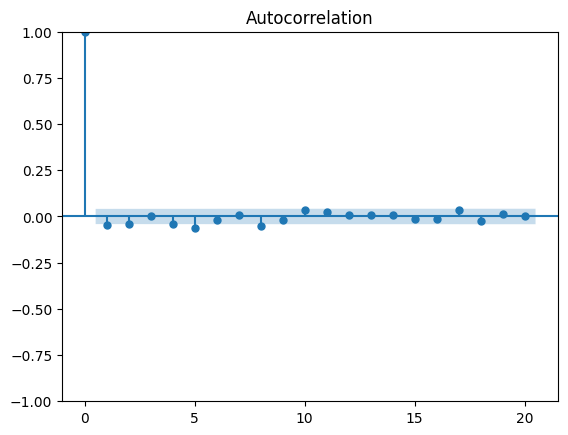

AMZN


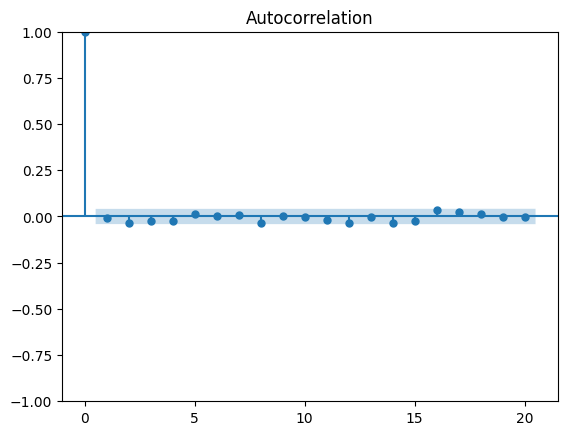

TSLA


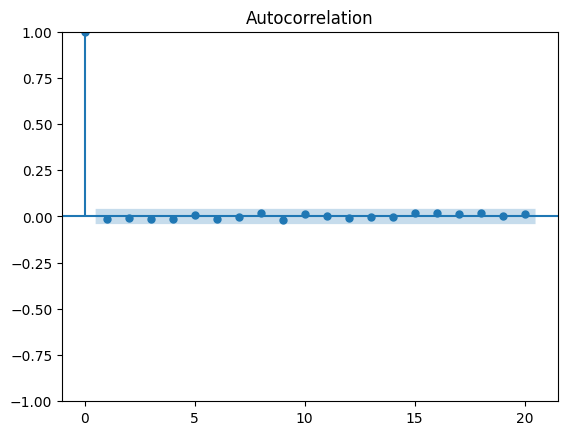

UNH


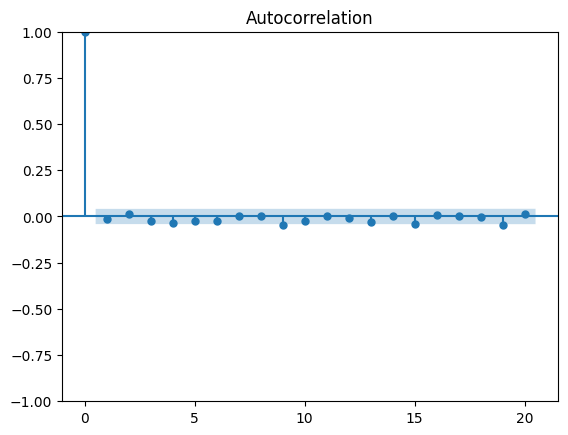

JNJ


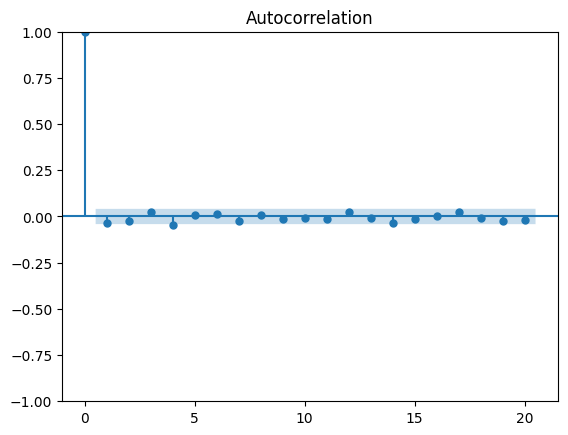

XOM


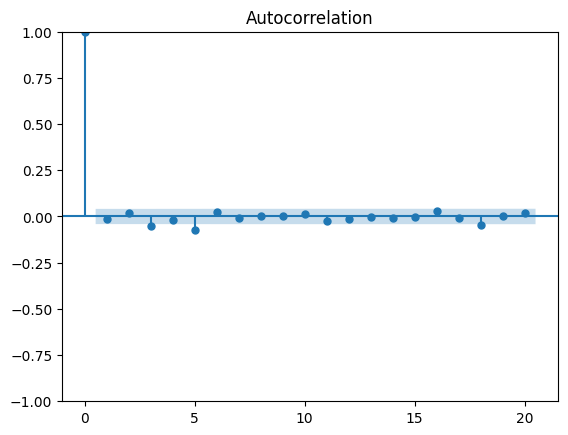

V


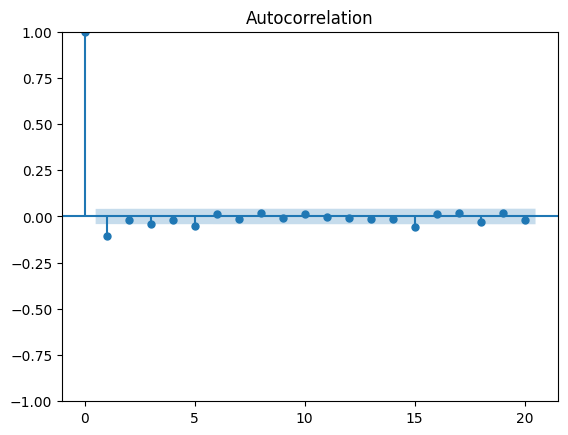

WMT


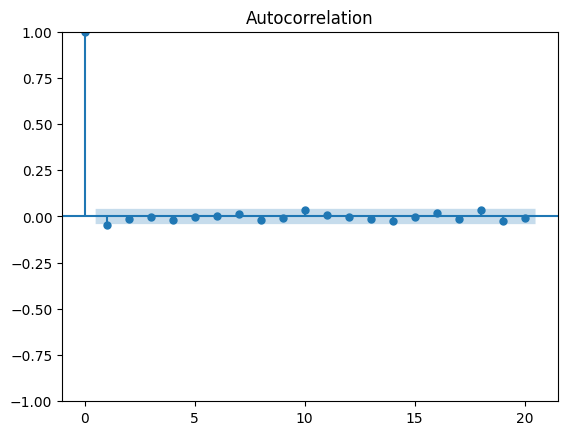

JPM


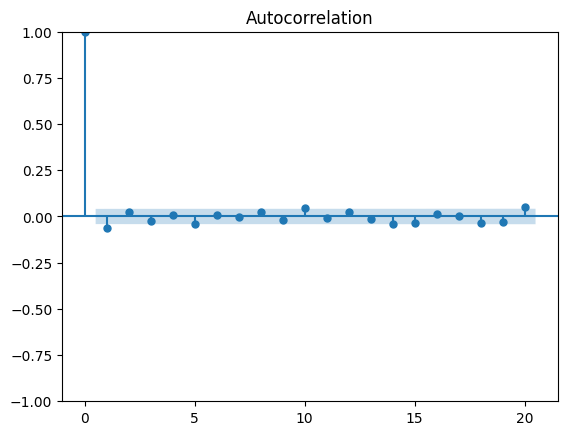

NVDA


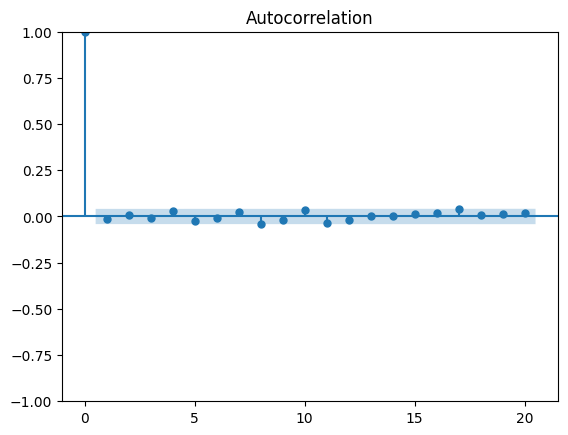

In [226]:
for variable in df.columns[:-1]:
    plot_acf(df[variable], lags = 20)
    print(variable)
    plt.show()

## The code below is copied from my thesis, most of it will probably be usefull. will sort out later which parts we need and which we dont as the anaylisis proceeds

In [227]:
modelVAR.select_order(maxlags = 3).summary()

NameError: name 'modelVAR' is not defined

In [ ]:
results = modelVAR.fit(3)
results.summary()

In [ ]:
#results indicate significant residual auto correlation

results.test_whiteness().summary()

In [ ]:
#Normality looks okay

results.test_normality().summary()

In [ ]:
corr = df.corr()
corr
# corr.style.background_gradient(cmap='coolwarm')

In [ ]:
#testing for ARCH effects

residuals = resultsVECM_oldagedependecyratio_exogcoint.resid
print("Engle’s Test for Autoregressive Conditional Heteroscedasticity (ARCH)\n")
for i in range(len(residuals[0,:])):
    het_test_result= het_arch(residuals[:,i],nlags=2)
    print(f'the Lagrange multiplier test of variable: {endog.columns[i]} has test statistic: {het_test_result[0]} and has p-value: {het_test_result[1]}')
    if het_test_result[1] <=0.05:
        print('found p-value < 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is rejected\n')
    else:
        print('found p-value > 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is not rejected\n')

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residuals)

In [ ]:

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=2
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


df_1 = grangers_causation_matrix(df, variables = df.columns)  
df_1
